<a href="https://colab.research.google.com/github/Hemant-1Kumar/heyBUddy/blob/main/Bharat_intern_task_1_stock_price_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK**-1 ***STOCK*** ***PRICE*** ***PREDICTION***

* Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code








         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
10 epoch loss 0.03775792
20 epoch loss 0.029614946
30 epoch loss 0.02304806
40 epoch loss 0.017541533
50 epoch loss 0.0119051365
60 epoch loss 0.0047003883
70 epoch loss 0.0028621554
80 epoch loss 0.0025106415
90 epoch loss 0.0022936633


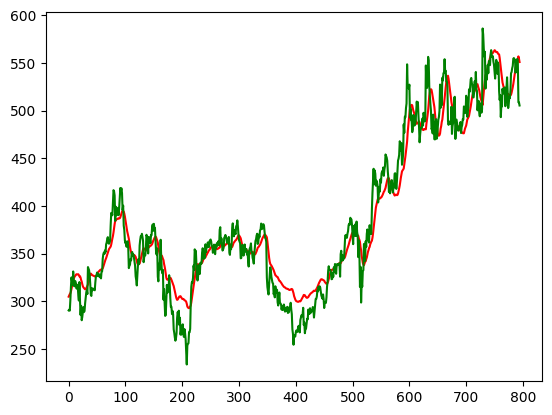

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

df= pd.read_csv("NFLX.csv")
print(df.head())
closed_prices = df["Close"]
seq_len = 15


mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

X=[]
Y=[]

for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

model = Model(1,64)

optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.MSELoss()
num_epochs=100

for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

model.eval()
with torch.no_grad():
    output=model(test_x)
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()
